<center>

# <font size="6" color="darkblue">Trabalho Laboratorial 1</font>

<br><br>

## <font size="4" color="black">Instituto Superior de Engenharia de Lisboa</font>

### Aprendizagem Automática

#### Docente: G. Marques

<br>

#### Realizado por:

<p style="text-align: center;"><font size="3">Belarmino Rafael Sacate nº: 52057</font></p>

<p style="text-align: center;"><font size="3">Miguel Ferreira nº: 51878</font></p>

<br><br>

#### Data: 01 de Novembro de 2025

<br><br><br>

</center>

---

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

---

##### leitura dos dados

In [97]:
fName1 = "pimaDiabetes.p"
D = pickle.load(open(fName1, 'rb')) 

X.shape:  (768, 8)
y.shape:  (768,)
Número de exemplos positivos (diabetes): 268
Número de exemplos negativos (sem diabetes): 500
Número de Características:  8
Número de Pessoas:  768
Características:  ['Number of times pregnant', 'Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)', 'Diastolic Blood Pressure (mm Hg)', 'Triceps skin fold thickness (mm)', '2-Hour Serum insulin (µh/ml)', 'Body mass index [weight in kg/(Height in m)]', 'Diabetes pedigree function', 'Age (years)']
500 mulheres sem diabetes (0) e 268 com diabetes (1)


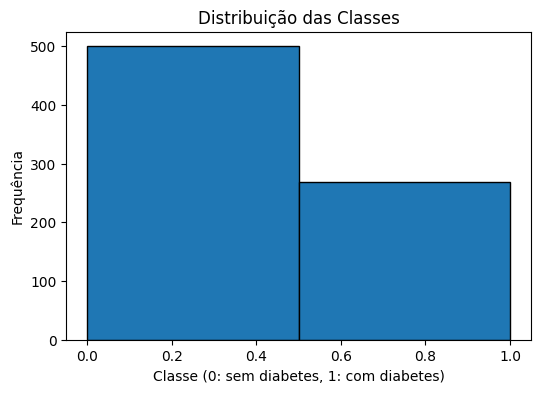

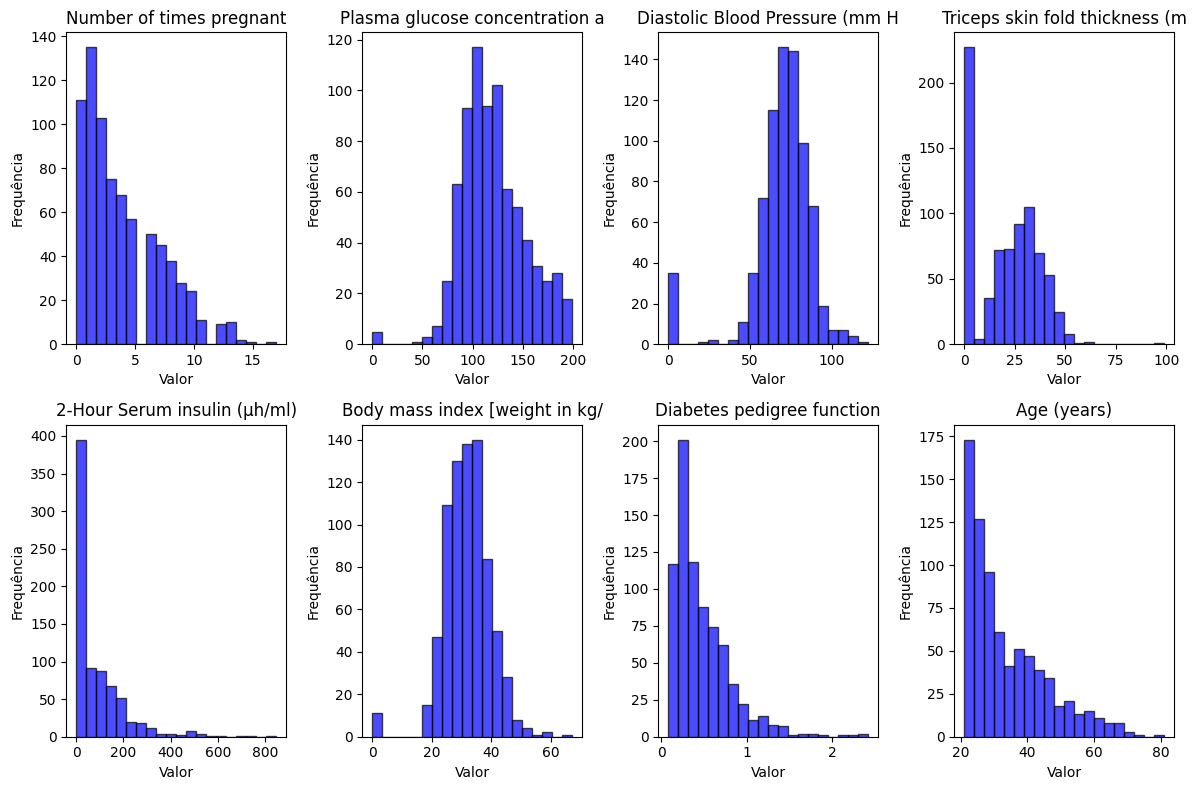

In [133]:
X = D['data']
y = D['target']
feature_names = D['feature_names']

print("X.shape: ", X.shape)
print("y.shape: ",y.shape)
print("Número de exemplos positivos (diabetes):", np.sum(y)) 
print("Número de exemplos negativos (sem diabetes):", np.sum(y == 0))
print("Número de Características: ", len(feature_names))
print("Número de Pessoas: ", len(y))
print("Características: ", feature_names)
print("500 mulheres sem diabetes (0) e 268 com diabetes (1)")

# Visualizar distribuição das classes (histograma)
plt.figure(figsize=(6, 4))
plt.hist(y, bins=2, edgecolor='black')
plt.xlabel('Classe (0: sem diabetes, 1: com diabetes)')
plt.ylabel('Frequência')
plt.title('Distribuição das Classes')
plt.show()
plt.figure(figsize=(12, 8))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.hist(X[:, i], bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title(feature_names[i][:30])  # primeiros 30 caracteres do nome
    plt.xlabel('Valor')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

----

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)
prporcap_positivos_treino = np.sum(y_train) / len(y_train)
prporcap_positivos_teste = np.sum(y_test) / len(y_test)

print("Proporção positivos no treino: ", prporcap_positivos_treino)
print("Proporção positivos no teste: ", prporcap_positivos_teste)

Proporção positivos no treino:  0.349609375
Proporção positivos no teste:  0.34765625


----

### LogisticRegression

----


Matriz de Confusão (com normalização, threshold=0):
[[141  26]
 [ 41  48]]
Erros totais: 67

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       167
           1       0.65      0.54      0.59        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.70       256
weighted avg       0.73      0.74      0.73       256


Matrizes de Confusão para diferentes thresholds (com normalização):
Threshold >= 0 [[141  26]
 [ 41  48]]
Threshold >= 0.5 [[151  16]
 [ 52  37]]
Threshold >= 1 [[159   8]
 [ 60  29]]
Threshold >= 1.5 [[164   3]
 [ 71  18]]
Threshold >= 2 [[167   0]
 [ 78  11]]
Threshold >= -0.5 [[135  32]
 [ 27  62]]
Threshold >= -1 [[114  53]
 [ 15  74]]
Threshold >= -1.5 [[89 78]
 [ 7 82]]
Threshold >= -2 [[ 61 106]
 [  2  87]]
Threshold >= -2.61 [[ 33 134]
 [  1  88]]


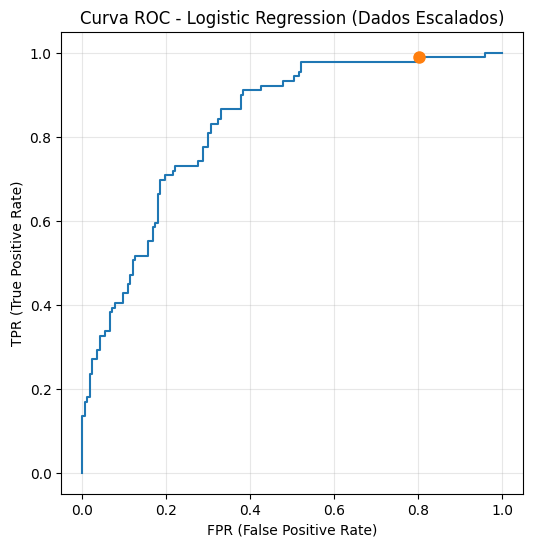

In [132]:
# TESTE DO CLASSIFICADOR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LogisticRegression(max_iter=5000, random_state=42).fit(X_train_scaled, y_train)

# MATRIZ DE CONFUSAO
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)
print("\nMatriz de Confusão (com normalização, threshold=0):")
print(confusion_matrix(y_test, y_test_pred_scaled))
erros = np.sum(y_test != y_test_pred_scaled)
print("Erros totais:", erros)

#REPORT
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_test_pred_scaled))

#FUNCAO DE DECISAO
y_test_dec_scaled = lr_scaled.decision_function(X_test_scaled)

# TESTE DOS LINEARES
print("\nMatrizes de Confusão para diferentes thresholds (com normalização):")
thresholds = [0, 0.5, 1, 1.5, 2, -0.5, -1, -1.5, -2, -2.61]
for thresh in thresholds:
    cm = confusion_matrix(y_test, y_test_dec_scaled >= thresh)
    print("Threshold >=", thresh, cm)

# Curva ROC
fpr_scaled, tpr_scaled, _ = roc_curve(y_test, y_test_dec_scaled)
plt.figure(figsize=(6, 6))
plt.plot(fpr_scaled, tpr_scaled)
plt.plot(134/(33+134), 88/89, 'o', markersize=8, label='Ponto ótimo')  
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('Curva ROC - Logistic Regression (Dados Escalados)')
plt.grid(True, alpha=0.3)
plt.axis('scaled')
plt.show()  